# Symmetrization of Wannier Hamiltonian and matrices 

By Xiaoxiong Liu : xxliu@physik.uzh.ch

The real-space Wannier Hamiltonian obtained by Wannier90 code generally does not strictly preserve the corresponding symmetry. The slight loss of symmetry will gap the expected band intersections. Berry curvature and orbital magnetic moment are more sensitive to symmetry than energy eigenvalues. In the following, I give details about the symmetrization of Wannier Hamiltonian and matrices.

In WannierBerri, our built-in symmetrization method can enforce symmetrizing Wannier Hamiltonian (Ham_R) and matrices (AA_R, BB_R, CC_R, SS_R) after reading them.

$Ham\_R = <n0|\hat{H}|mR>$

$AA\_R = <n0|\hat{r}|mR>$

$BB\_R = <n0|\hat{H}\cdot(\hat{r}-\hat{R})|mR>$

$CC\_R_c = i \epsilon_{abc} <n0|\hat{r}_a\cdot\hat{H}\cdot(\hat{r}_b-\hat{R}_b)|mR>$

$SS\_R = <n0|\hat{\sigma}|mR>$

They are needed when calculating different quantities:
1. Energy eigenvalue  <-- Ham_R
2. Berry Curvature  <-- Ham_R, AA_R
3. Orbital magnetic moment  <-- Ham_R, AA_R, BB_R, CC_R
4. Spin magnetic moment  <-- SS_R

NOTE: This method only works with Wannier Hamiltonian without maximal localized. 

We will show you two examples:
1. Symmetrize nonmagnetic system with SOC (trigonal Te)
2. Symmetrize magnetic system with SOC (bcc Fe)

In [1]:
#import necessary packages
import wannierberri as wberri
import numpy as np
import matplotlib.pyplot as plt #for plotting figures

## Nonmagnetic system (trigonal Te)

In [2]:
#Reading Wannier Hamiltonian and position element matrix from Te_tb.dat file.
#We bulit to system, `system_Te` without symmetrization and `system_Te_sym` with symmetrization

system_Te=wberri.System_tb(tb_file='./Te_data/Te_tb.dat',berry=True,use_ws=False)
system_Te_sym=wberri.System_tb(tb_file='./Te_data/Te_tb.dat',berry=True,use_ws=False)

#Symmetrization step.
system_Te_sym.symmetrize(
    # positions: positions of each atoms in a unitcell (direct coordinate system)
    positions = np.array([[0.274, 0.274, 0.0],   
                    [0.726, 0.0, 0.33333333],
                   [0.0, 0.726, 0.66666667]]),
    # atom_name: name of each atoms, need to correspond to position order.
    atom_name = ['Te','Te','Te'],
    # projections: should be the same with projection card in wannier90.win
    proj = ['Te:s','Te:p'],
    # soc: with soc or spinless
    soc=True,
    # DFT_code: What code was used to complet the DFT calculation. only support VASP and QE now.
    DFT_code='vasp',
    )

reading TB file ./Te_data/Te_tb.dat ( written on  9May2022 at 22:54:49 )


NOT using ws_dist
Number of wannier functions: 24
Number of R points: 195
Recommended size of FFT grid [7 9 5]
Reading the system from ./Te_data/Te_tb.dat finished successfully
reading TB file ./Te_data/Te_tb.dat ( written on  9May2022 at 22:54:49 )


NOT using ws_dist
Number of wannier functions: 24
Number of R points: 195
Recommended size of FFT grid [7 9 5]
Reading the system from ./Te_data/Te_tb.dat finished successfully
Wannier atoms info
(1, 'Te', array([0.274, 0.274, 0.   ]), ['s', 'p'], [[0, 12], [3, 4, 5, 15, 16, 17]])
(2, 'Te', array([0.726     , 0.        , 0.33333333]), ['s', 'p'], [[1, 13], [6, 7, 8, 18, 19, 20]])
(3, 'Te', array([0.        , 0.726     , 0.66666667]), ['s', 'p'], [[2, 14], [9, 10, 11, 21, 22, 23]])
[get_spacegroup]
  Spacegroup is P3_121 (152).
  ---------------    1 ---------------
 det =  0.9999999999999999
  rotation:                    cart:
     [ 1  0  0]                    [1.00 0.00 0.00]
     [ 0  1  0]                    [0.00 1.00 0.00]
     [ 0  0  1]                    [0.00 0.00 1.00]
  translation:
     (-0.00000 -0.00000 -0.00000)  ( 0.00000  0.00000  0.00000)
  ---------------    2 ---------------
 det =  0.9999999999999999
  rotation:                    cart:
     [ 0 -1  0]           

rot =  2


rot =  3


rot =  4


rot =  5


rot =  6


number of symmetry oprations ==  12
nRvec_add = 288
rot =  1


rot =  2


rot =  3


rot =  4


rot =  5


rot =  6


number of symmetry oprations ==  12
Symmetrizing Finished
-1.5255204586113058e-17
Testing AA with diag = True
[0,0,0]
[ 0.6043  3.2484 -1.6242  0.6191  0.6063  0.5893  3.2189  3.2463  3.2765 -1.6094 -1.6222 -1.6392  0.6043  3.2484 -1.6242  0.6191  0.6063  0.5893  3.2189  3.2463  3.2765 -1.6094 -1.6222 -1.6392]
[ 0.6042  3.2484 -1.6243  0.619   0.6005  0.5952  3.2189  3.2494  3.2734 -1.6095 -1.628  -1.6333  0.6042  3.2484 -1.6243  0.619   0.6005  0.5952  3.2189  3.2494  3.2734 -1.6095 -1.628  -1.6333]
[1.0467 0.     2.8132 1.0723 1.0218 1.049  0.     0.     0.     2.7876 2.8381 2.8108 1.0467 0.     2.8132 1.0723 1.0218 1.049  0.     0.     0.     2.7876 2.8381 2.8108]
[ 1.0468 -0.      2.8131  1.0723  1.0268  1.0438 -0.      0.     -0.      2.7876  2.833   2.8161  1.0468 -0.      2.8131  1.0723  1.0268  1.0438 -0.      0.     -0.      2.7875  2.8331  2.8161]
[ 0.      1.986   3.9721  0.     -0.0291  0.0291  1.986   1.986   1.986   3.9721  4.0011  3.943   0.      1.986   3.9721  0.     -

Output card `Wannier atoms info` is showing informations about orbitals.

Line `(1, 'Te', array([0.274, 0.274, 0.   ]), ['s', 'p'], [[0, 12], [3, 4, 5, 15, 16, 17]])` read as:
First atoms is Te at position 0.274, 0.274, 0. It contribute orbital $s$ and $p$. Index of s-orbitals are 0 and 12. Index of d-orbitals are 3, 4, 5, 15, 16, 17.

Informations of space group are showed as well.

We can check if real space Hamiltonian are symmetrized.

In [3]:
#We check symmetry with operator 1 from Space group informations in the output.
#prepare operator
rot = np.array([[0., -1., 0.],[1, -1, 0.],[0., 0., 1.]]) # rotation matrix (direct)
trans = np.array([0., 0., 1./3.])  #translation (direct)

In [4]:
#After operation, position of Te_1 match Te_2.
Te_1_position = np.array([0.274, 0.274, 0.])
position_rot = rot @ Te_1_position + trans
print('Before operation', Te_1_position)
print('After operation', position_rot, 'match Te_2_position')

Before operation [0.274 0.274 0.   ]
After operation [-0.274       0.          0.33333333] match Te_2_position


So the on-site energy of Te_1 s-orbitals should match on-site energy of Te_1 s-orbitals as well.

In [5]:
#Check unsymmetrized system

#find index of R=[0,0,0] in R-vector list
#dimension of Hamiltonian is [num_wann, num_wann, num_Rvec]
R0 = system_Te.iRvec.tolist().index([0,0,0])
onsite_Te_1 = np.diagonal(system_Te.Ham_R[:,:,R0]).real[np.array([0, 12])]
onsite_Te_2 = np.diagonal(system_Te.Ham_R[:,:,R0]).real[np.array([1, 13])]

print('unsymmetrized')
print('on-site energy of Te_1 orbitals')
print(onsite_Te_1)
print('on-site energy of Te_2 orbitals')
print(onsite_Te_2)
print('not totaly the same')

unsymmetrized
on-site energy of Te_1 orbitals
[-5.585966  -5.5859776]
on-site energy of Te_2 orbitals
[-5.588091  -5.5880802]
not totaly the same


In [6]:
#Check symmetrized system

#find index of R=[0,0,0] in R-vector list
#dimension of Hamiltonian is [num_wann, num_wann, num_Rvec]
R0 = system_Te.iRvec.tolist().index([0,0,0])
onsite_Te_1_sym = np.diagonal(system_Te_sym.Ham_R[:,:,R0]).real[np.array([0, 12])]
onsite_Te_2_sym = np.diagonal(system_Te_sym.Ham_R[:,:,R0]).real[np.array([1, 13])]

print('symmetrized')
print('on-site energy of Te_1 orbitals')
print(onsite_Te_1_sym)
print('on-site energy of Te_2 orbitals')
print(onsite_Te_2_sym)
print('totaly the same')

symmetrized
on-site energy of Te_1 orbitals
[-5.58668017 -5.58668017]
on-site energy of Te_2 orbitals
[-5.58668017 -5.58668017]
totaly the same


Checking band structures in k-space.

The Brillouin zone of trigonal Te is:
<img src="./Te_data/Te_BZ.png" width="300">
We only consider kz=$\pi$ plane. 
<img src="./Te_data/Te_kz=pi.png" width="300">
The band structures of the three path:

L1 -> H -> A1

L2 -> H -> A2

L3 -> H -> A3

should be the same because of C3 rotation symmetry.

But the Wannier Hamitonian break the symmetries slightly. So the band structure of the three path may not the same.

After symmetrization they are the same.


In [7]:
#generate k-path
path=wberri.Path(system_Te,
    #start and end points of k_path.
    #If two paths are not consencutive, put `None` between them. 
    k_nodes=[[0,0.5,0.5],[1./3,1./3,0.5],[1.,0.,0.5],None, 
            [0.5,0.,0.5],[1./3,1./3,0.5],[0.,1.,0.5],None,
            [0.5,0.5,0.5],[1./3,1./3,0.5],[0.,0.,0.5]],
    labels=["L1","H","A1","L3","H","A3","L2","H","A2"],
    #length: proportional to number of kpoints.
    length=1000) 

#calculate band structure with unsymmetrized and symmetrized system.
quantities = {"Energy":wberri.calculators.tabulate.Energy()}

calculators={}
calculators ["tabulate"] = wberri.calculators.TabulatorAll(quantities,ibands=[18,19],mode="path")

path_result_Te = wberri.run(
        system=system_Te,
        grid=path,
        calculators=calculators)
path_result_Te_sym = wberri.run(
        system=system_Te_sym,
        grid=path,
        calculators=calculators)

calculator not described

Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.TabulatorAll object at 0x7f52cd3bca60>
All calculators are compatible
Symmetrization switched off for Path
The set of k points is a Path() with 676 points and labels {0: 'L1', 75: 'H', 225: 'L3', 300: 'H', 450: 'L2', 525: 'H', 675: 'A2'}
generating K_list
Done 
Done, sum of weights:676.0
iteration 0 - 676 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.500000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 1 : coord in rec.lattice = [   0.004444  ,   0.497778 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 2 : coord in rec.lattice = [   0.008889  ,   0.495556 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 3 : coord in rec.lattice = [   0.013333  ,   0.493333 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 4 : coord in rec.lattice = [   0.017778  ,   0.491111 ,    0.500000 ]

                   7              0.0                   2.5


                  14              0.1                   2.9


                  21              0.1                   2.7


                  28              0.1                   2.6


                  35              0.1                   2.5


                  42              0.2                   2.5


                  49              0.2                   2.4


                  56              0.2                   2.4


                  63              0.2                   2.3


                  70              0.3                   2.3


                  77              0.3                   2.3


                  84              0.3                   2.3


                  91              0.3                   2.2


                  98              0.4                   2.2


                 105              0.4                   2.2


                 112              0.4                   2.2


                 119              0.5                   2.2


                 126              0.5                   2.1


                 133              0.5                   2.1


                 140              0.5                   2.1


                 147              0.6                   2.1


                 154              0.6                   2.0


                 161              0.6                   2.0


                 168              0.7                   2.0


                 175              0.7                   1.9


                 182              0.7                   1.9


                 189              0.7                   1.9


                 196              0.8                   1.9


                 203              0.8                   1.8


                 210              0.8                   1.8


                 217              0.8                   1.8


                 224              0.9                   1.8


                 231              0.9                   1.7


                 238              0.9                   1.7


                 245              1.0                   1.7


                 252              1.0                   1.7


                 259              1.0                   1.6


                 266              1.0                   1.6


                 273              1.1                   1.6


                 280              1.1                   1.6


                 287              1.1                   1.5

                 294              1.2                   1.5


                 301              1.2                   1.5


                 308              1.2                   1.5

                 315              1.2                   1.4

                 322              1.3                   1.4


                 329              1.3                   1.4


                 336              1.3                   1.3


                 343              1.3                   1.3


                 350              1.4                   1.3


                 357              1.4                   1.3


                 364              1.4                   1.2


                 371              1.4                   1.2


                 378              1.5                   1.2


                 385              1.5                   1.1


                 392              1.5                   1.1


                 399              1.6                   1.1


                 406              1.6                   1.1


                 413              1.6                   1.0


                 420              1.6                   1.0


                 427              1.7                   1.0


                 434              1.7                   0.9


                 441              1.7                   0.9


                 448              1.7                   0.9


                 455              1.8                   0.9


                 462              1.8                   0.8


                 469              1.8                   0.8


                 476              1.8                   0.8


                 483              1.9                   0.7


                 490              1.9                   0.7


                 497              1.9                   0.7


                 504              1.9                   0.7


                 511              2.0                   0.6


                 518              2.0                   0.6


                 525              2.0                   0.6


                 532              2.0                   0.6


                 539              2.1                   0.5


                 546              2.1                   0.5


                 553              2.1                   0.5


                 560              2.1                   0.4


                 567              2.2                   0.4


                 574              2.2                   0.4


                 581              2.2                   0.4


                 588              2.2                   0.3


                 595              2.3                   0.3


                 602              2.3                   0.3


                 609              2.3                   0.3


                 616              2.3                   0.2


                 623              2.4                   0.2


                 630              2.4                   0.2


                 637              2.4                   0.1


                 644              2.4                   0.1


                 651              2.5                   0.1


                 658              2.5                   0.1


                 665              2.5                   0.0

                 672              2.5                   0.0


time for processing    676 K-points in serial:     2.5586 ; per K-point          0.0038 ; proc-sec per K-point          0.0038


time1 =  0.06209301948547363
Totally processed 676 K-points 
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.TabulatorAll object at 0x7f52cd3bca60>
All calculators are compatible
Symmetrization switched off for Path
The set of k points is a Path() with 676 points and labels {0: 'L1', 75: 'H', 225: 'L3', 300: 'H', 450: 'L2', 525: 'H', 675: 'A2'}
generating K_list
Done 
Done, sum of weights:676.0
iteration 0 - 676 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.500000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 1 : coord in rec.lattice = [   0.004444  ,   0.497778 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 2 : coord in rec.lattice = [   0.008889  ,   0.495556 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 3 : coord in rec.lattice = [   0.013333  ,   0.493333 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 4 : coord in rec.lattice = [   0.0

 K-point 81 : coord in rec.lattice = [   0.360000  ,   0.320000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 82 : coord in rec.lattice = [   0.364444  ,   0.317778 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 83 : coord in rec.lattice = [   0.368889  ,   0.315556 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 84 : coord in rec.lattice = [   0.373333  ,   0.313333 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 85 : coord in rec.lattice = [   0.377778  ,   0.311111 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 86 : coord in rec.lattice = [   0.382222  ,   0.308889 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 87 : coord in rec.lattice = [   0.386667  ,   0.306667 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 88 : coord in rec.lattice = [   0.391111  ,   0.304444 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 89 : coord in rec.lattice = [   0.395556  ,   0.302222 

 K-point 286 : coord in rec.lattice = [   0.364444  ,   0.271111 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 287 : coord in rec.lattice = [   0.362222  ,   0.275556 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 288 : coord in rec.lattice = [   0.360000  ,   0.280000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 289 : coord in rec.lattice = [   0.357778  ,   0.284444 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 290 : coord in rec.lattice = [   0.355556  ,   0.288889 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 291 : coord in rec.lattice = [   0.353333  ,   0.293333 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 292 : coord in rec.lattice = [   0.351111  ,   0.297778 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 293 : coord in rec.lattice = [   0.348889  ,   0.302222 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 294 : coord in rec.lattice = [   0.346667  ,   

 K-point 435 : coord in rec.lattice = [   0.033333  ,   0.933333 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 436 : coord in rec.lattice = [   0.031111  ,   0.937778 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 437 : coord in rec.lattice = [   0.028889  ,   0.942222 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 438 : coord in rec.lattice = [   0.026667  ,   0.946667 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 439 : coord in rec.lattice = [   0.024444  ,   0.951111 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 440 : coord in rec.lattice = [   0.022222  ,   0.955556 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 441 : coord in rec.lattice = [   0.020000  ,   0.960000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 442 : coord in rec.lattice = [   0.017778  ,   0.964444 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 443 : coord in rec.lattice = [   0.015556  ,   

 K-point 568 : coord in rec.lattice = [   0.237778  ,   0.237778 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 569 : coord in rec.lattice = [   0.235556  ,   0.235556 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 570 : coord in rec.lattice = [   0.233333  ,   0.233333 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 571 : coord in rec.lattice = [   0.231111  ,   0.231111 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 572 : coord in rec.lattice = [   0.228889  ,   0.228889 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 573 : coord in rec.lattice = [   0.226667  ,   0.226667 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 574 : coord in rec.lattice = [   0.224444  ,   0.224444 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 575 : coord in rec.lattice = [   0.222222  ,   0.222222 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 576 : coord in rec.lattice = [   0.220000  ,   

 K-point 606 : coord in rec.lattice = [   0.153333  ,   0.153333 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 607 : coord in rec.lattice = [   0.151111  ,   0.151111 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 608 : coord in rec.lattice = [   0.148889  ,   0.148889 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 609 : coord in rec.lattice = [   0.146667  ,   0.146667 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 610 : coord in rec.lattice = [   0.144444  ,   0.144444 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 611 : coord in rec.lattice = [   0.142222  ,   0.142222 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 612 : coord in rec.lattice = [   0.140000  ,   0.140000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 613 : coord in rec.lattice = [   0.137778  ,   0.137778 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 614 : coord in rec.lattice = [   0.135556  ,   

                   7              0.1                   5.3


                  14              0.1                   5.0


                  21              0.1                   4.7


                  28              0.2                   4.4


                  35              0.2                   4.3


                  42              0.3                   4.2


                  49              0.3                   4.1


                  56              0.4                   4.0


                  63              0.4                   3.9


                  70              0.4                   3.8


                  77              0.5                   3.8


                  84              0.5                   3.7


                  91              0.6                   3.7


                  98              0.6                   3.7


                 105              0.7                   3.6


                 112              0.7                   3.6


                 119              0.8                   3.5


                 126              0.8                   3.5


                 133              0.8                   3.5


                 140              0.9                   3.4


                 147              0.9                   3.4


                 154              1.0                   3.3


                 161              1.0                   3.3


                 168              1.1                   3.2


                 175              1.1                   3.2


                 182              1.2                   3.1


                 189              1.2                   3.1


                 196              1.2                   3.0


                 203              1.3                   3.0


                 210              1.3                   2.9


                 217              1.4                   2.9


                 224              1.4                   2.8


                 231              1.4                   2.8


                 238              1.5                   2.7


                 245              1.5                   2.7


                 252              1.6                   2.7


                 259              1.6                   2.6


                 266              1.7                   2.5


                 273              1.7                   2.5


                 280              1.7                   2.5


                 287              1.8                   2.4


                 294              1.8                   2.4


                 301              1.9                   2.3


                 308              1.9                   2.3


                 315              1.9                   2.2


                 322              2.0                   2.2


                 329              2.0                   2.1


                 336              2.1                   2.1


                 343              2.1                   2.1


                 350              2.2                   2.0


                 357              2.2                   2.0


                 364              2.2                   1.9


                 371              2.3                   1.9


                 378              2.3                   1.8


                 385              2.4                   1.8


                 392              2.4                   1.7


                 399              2.5                   1.7


                 406              2.5                   1.7


                 413              2.5                   1.6


                 420              2.6                   1.6


                 427              2.6                   1.5


                 434              2.7                   1.5


                 441              2.7                   1.4


                 448              2.8                   1.4


                 455              2.8                   1.4


                 462              2.8                   1.3


                 469              2.9                   1.3


                 476              2.9                   1.2


                 483              3.0                   1.2


                 490              3.0                   1.1


                 497              3.1                   1.1


                 504              3.1                   1.1


                 511              3.1                   1.0


                 518              3.2                   1.0


                 525              3.2                   0.9


                 532              3.3                   0.9


                 539              3.3                   0.8


                 546              3.4                   0.8


                 553              3.4                   0.8


                 560              3.4                   0.7


                 567              3.5                   0.7


                 574              3.5                   0.6


                 581              3.6                   0.6


                 588              3.6                   0.5


                 595              3.7                   0.5


                 602              3.7                   0.5


                 609              3.8                   0.4


                 616              3.8                   0.4


                 623              3.9                   0.3


                 630              3.9                   0.3


                 637              3.9                   0.2


                 644              4.0                   0.2


                 651              4.0                   0.2


                 658              4.1                   0.1


                 665              4.1                   0.1


                 672              4.1                   0.0


time for processing    676 K-points in serial:     4.1573 ; per K-point          0.0061 ; proc-sec per K-point          0.0061


time1 =  0.060875892639160156
Totally processed 676 K-points 


In [8]:
#read energy eigenvalue data of band 18 and 19 from results.
band_Te = path_result_Te.results['tabulate'].get_data(quantity='Energy',iband=(0,1))
band_Te_sym = path_result_Te_sym.results['tabulate'].get_data(quantity='Energy',iband=(0,1))
#read k-path data
band_k=path.getKline()

Text(0.5, 0, 'L -> H -> A')

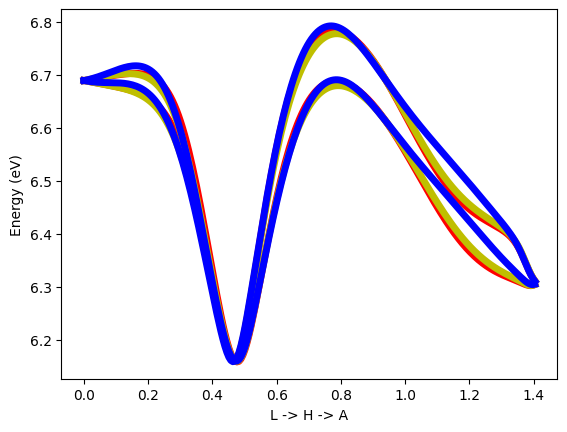

In [9]:
#plot band structure with unsymmetrized system
NK=len(band_k)
colour = ['r','y','b']
NK_one = NK//3
plt.figure()
for i in range(3):
    plt.plot(band_k[0:NK_one],band_Te[NK_one*i:NK_one*(i+1)],colour[i],linewidth=5)
plt.ylabel('Energy (eV)')
plt.xlabel('L -> H -> A')

Text(0.5, 0, 'L -> H -> A')

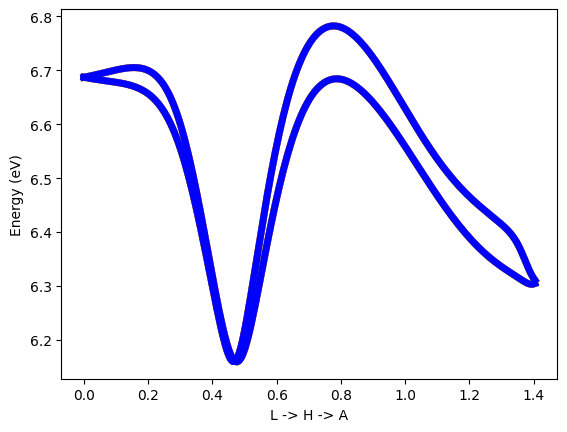

In [10]:
#plot band structure with symmetrized system
plt.figure()
for i in range(3):
    plt.plot(band_k[0:NK_one],band_Te_sym[NK_one*i:NK_one*(i+1)],colour[i],linewidth=5)
plt.ylabel('Energy (eV)')
plt.xlabel('L -> H -> A')

Symmetrization fix the symmetries of Hamiltonian

The Berry curvature is more sensitive to symmetry than energy eigenvalues.

In [11]:
# calculate Berry curvature alone a k-path.
path_berry=wberri.Path(system_Te,
                 k_nodes=[[0,0.5,0.5],[1./3,1./3,0.5],[1./3,1./3,0.]],
                 labels=["L","H","K",],
                 length=500)

quantities = {"Energy":wberri.calculators.tabulate.Energy(),
              "berry":wberri.calculators.tabulate.BerryCurvature(),}

calculators={}
calculators ["tabulate"] = wberri.calculators.TabulatorAll(quantities,ibands=[18,19],mode="path")

berry_result_Te = wberri.run(
        system=system_Te,
        grid=path_berry,
        calculators=calculators)

berry_result_Te_sym = wberri.run(
        system=system_Te_sym,
        grid=path_berry,
        calculators=calculators)

calculator not described

calculator not described

Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.TabulatorAll object at 0x7f528917f100>
All calculators are compatible
Symmetrization switched off for Path
The set of k points is a Path() with 80 points and labels {0: 'L', 37: 'H', 79: 'K'}
generating K_list
Done 
Done, sum of weights:80.0
iteration 0 - 80 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.500000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 1 : coord in rec.lattice = [   0.009009  ,   0.495495 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 2 : coord in rec.lattice = [   0.018018  ,   0.490991 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 3 : coord in rec.lattice = [   0.027027  ,   0.486486 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 4 : coord in rec.lattice = [   0.036036  ,   0.481982 ,    0.500000 ], refinement level:0, 

                   1              0.0                   2.6


                   2              0.1                   2.6


                   3              0.1                   2.5


                   4              0.1                   2.4


                   5              0.2                   2.4


                   6              0.2                   2.4


                   7              0.2                   2.4


                   8              0.3                   2.3


                   9              0.3                   2.3


                  10              0.3                   2.2


                  11              0.3                   2.2


                  12              0.4                   2.2


                  13              0.4                   2.1


                  14              0.4                   2.1


                  15              0.5                   2.1


                  16              0.5                   2.1


                  17              0.5                   2.0


                  18              0.6                   2.0


                  19              0.6                   1.9


                  20              0.6                   1.9


                  21              0.7                   1.9


                  22              0.7                   1.8


                  23              0.7                   1.8


                  24              0.8                   1.8


                  25              0.8                   1.7


                  26              0.8                   1.7


                  27              0.9                   1.7


                  28              0.9                   1.6


                  29              0.9                   1.6


                  30              0.9                   1.6


                  31              1.0                   1.5


                  32              1.0                   1.5


                  33              1.0                   1.5


                  34              1.1                   1.4


                  35              1.1                   1.4


                  36              1.1                   1.4


                  37              1.2                   1.4


                  38              1.2                   1.3


                  39              1.2                   1.3


                  40              1.3                   1.3


                  41              1.3                   1.2


                  42              1.3                   1.2

                  43              1.4                   1.2

                  44              1.4                   1.1


                  45              1.4                   1.1


                  46              1.5                   1.1


                  47              1.5                   1.1


                  48              1.5                   1.0


                  49              1.6                   1.0


                  50              1.6                   1.0


                  51              1.6                   0.9


                  52              1.7                   0.9


                  53              1.7                   0.9


                  54              1.7                   0.8


                  55              1.8                   0.8


                  56              1.8                   0.8


                  57              1.8                   0.7


                  58              1.9                   0.7


                  59              1.9                   0.7


                  60              1.9                   0.6


                  61              2.0                   0.6


                  62              2.0                   0.6

                  63              2.0                   0.5


                  64              2.1                   0.5


                  65              2.1                   0.5


                  66              2.1                   0.4


                  67              2.1                   0.4


                  68              2.2                   0.4


                  69              2.2                   0.4


                  70              2.2                   0.3


                  71              2.3                   0.3


                  72              2.3                   0.3


                  73              2.3                   0.2


                  74              2.4                   0.2


                  75              2.4                   0.2


                  76              2.4                   0.1


                  77              2.5                   0.1


                  78              2.5                   0.1


                  79              2.5                   0.0


                  80              2.6                   0.0


time for processing     80 K-points in serial:     2.5699 ; per K-point          0.0321 ; proc-sec per K-point          0.0321


time1 = 

 0.003631591796875
Totally processed 80 K-points 
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.TabulatorAll object at 0x7f528917f100>
All calculators are compatible
Symmetrization switched off for Path
The set of k points is a Path() with 80 points and labels {0: 'L', 37: 'H', 79: 'K'}
generating K_list
Done 
Done, sum of weights:80.0
iteration 0 - 80 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.500000 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 1 : coord in rec.lattice = [   0.009009  ,   0.495495 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 2 : coord in rec.lattice = [   0.018018  ,   0.490991 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 3 : coord in rec.lattice = [   0.027027  ,   0.486486 ,    0.500000 ], refinement level:0, dK=[1. 1. 1.]  
 K-point 4 : coord in rec.lattice = [   0.036036  ,   0.481982 ,    0.500000 ], refinement level:0, dK

                   1              0.1                   7.5


                   2              0.2                   7.3

                   3              0.3                   7.2


                   4              0.4                   7.0


                   5              0.5                   6.9


                   6              0.6                   6.8


                   7              0.7                   6.8


                   8              0.8                   6.8


                   9              0.8                   6.6


                  10              0.9                   6.6


                  11              1.0                   6.6


                  12              1.1                   6.4


                  13              1.2                   6.3


                  14              1.3                   6.2


                  15              1.4                   6.1


                  16              1.5                   6.0


                  17              1.6                   5.9


                  18              1.7                   5.8


                  19              1.8                   5.7


                  20              1.9                   5.6


                  21              2.0                   5.5


                  22              2.0                   5.4


                  23              2.1                   5.3


                  24              2.2                   5.2


                  25              2.3                   5.1


                  26              2.4                   5.0


                  27              2.5                   4.9


                  28              2.6                   4.9


                  29              2.7                   4.8


                  30              2.8                   4.7


                  31              2.9                   4.6


                  32              3.0                   4.5


                  33              3.1                   4.4


                  34              3.2                   4.3


                  35              3.3                   4.2


                  36              3.4                   4.1


                  37              3.5                   4.0


                  38              3.6                   4.0


                  39              3.7                   3.9


                  40              3.8                   3.8


                  41              3.9                   3.7


                  42              4.0                   3.7

                  43              4.1                   3.6


                  44              4.3                   3.5


                  45              4.4                   3.4


                  46              4.5                   3.3


                  47              4.6                   3.2

                  48              4.7                   3.1


                  49              4.8                   3.0


                  50              4.9                   2.9


                  51              5.0                   2.8


                  52              5.1                   2.7


                  53              5.2                   2.6


                  54              5.3                   2.5


                  55              5.4                   2.4


                  56              5.5                   2.4


                  57              5.6                   2.3


                  58              5.7                   2.2


                  59              5.8                   2.1


                  60              5.9                   2.0


                  61              6.0                   1.9


                  62              6.2                   1.8


                  63              6.3                   1.7


                  64              6.4                   1.6


                  65              6.5                   1.5


                  66              6.6                   1.4


                  67              6.7                   1.3


                  68              6.8                   1.2


                  69              6.9                   1.1


                  70              7.0                   1.0


                  71              7.1                   0.9


                  72              7.3                   0.8


                  73              7.4                   0.7


                  74              7.5                   0.6


                  75              7.6                   0.5


                  76              7.7                   0.4


                  77              7.8                   0.3


                  78              7.9                   0.2


                  79              8.0                   0.1


                  80              8.1                   0.0


time for processing     80 K-points in serial:     8.0581 ; per K-point          0.1007 ; proc-sec per K-point          0.1007


time1 =  0.0039005279541015625
Totally processed 80 K-points 


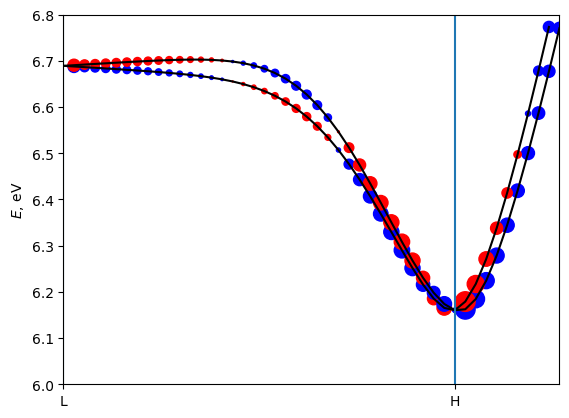

In [12]:
# use built-in plotting method to plot berry cuvature.
# red means positive, blue means negative.
# size of the dots shows the amplitude of the quantity.
# unsymmetrized:
berry_result_Te.results['tabulate'].plot_path_fat(path_berry,
              quantity='berry',
              component='z', # only take z compoment
              Emin=6.0,  Emax=6.8,
              mode="fatband",
              fatfactor=20,  # size of dots.
              )

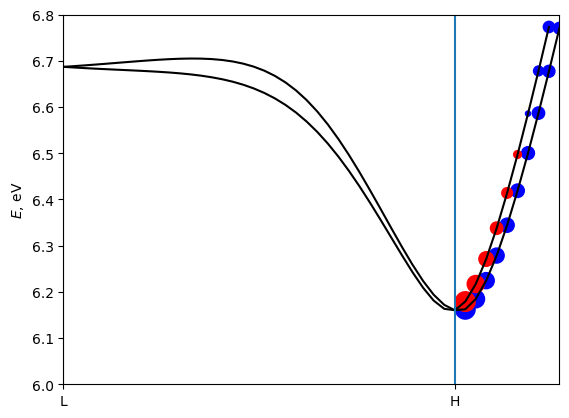

In [13]:
# symmetrized: 
berry_result_Te_sym.results['tabulate'].plot_path_fat(path_berry,
              quantity='berry',
              component='z', # only take z compoment
              Emin=6.0,  Emax=6.8,
              mode="fatband",
              fatfactor=20,  # size of dots.
              )

z-component of Berry curvature alone L-H path should be zero because of symmetry. The loss of symmetry has a big impact to Berry curvature of single k-point. It is fixed by symmetrization.

## Magnetic system with SOC (bcc Fe)

bcc Fe is a magnetic system with magnetic moment -2.31 \mu_B point to -z direction of cartesian coordinate system of lattice. We need to set parameter 'magmom'.

In [14]:
system_Fe=wberri.System_tb(tb_file='./Fe_data/Fe_tb.dat',berry=True, use_ws=False)
system_Fe_sym=wberri.System_tb(tb_file='./Fe_data/Fe_tb.dat',berry=True, use_ws=False)
system_Fe_sym.symmetrize(
             proj = ['Fe:sp3d2;t2g'],
             atom_name = ['Fe'],
             positions = [[0,0,0]],
             #magmom: magnetic moment of each atoms.
             magmom = [[0.,0.,-2.31]],
             soc=True,
             DFT_code = 'qe'
             )


reading TB file ./Fe_data/Fe_tb.dat ( written on 13May2022 at 01:23:14 )
NOT using ws_dist
Number of wannier functions: 18
Number of R points: 27
Recommended size of FFT grid [5 5 5]
Reading the system from ./Fe_data/Fe_tb.dat finished successfully
reading TB file ./Fe_data/Fe_tb.dat ( written on 13May2022 at 01:23:14 )
NOT using ws_dist
Number of wannier functions: 18
Number of R points: 27
Recommended size of FFT grid [5 5 5]
Reading the system from ./Fe_data/Fe_tb.dat finished successfully
Wannier atoms info
(1, 'Fe', [0, 0, 0], ['sp3d2', 't2g'], [[0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14], [6, 7, 8, 15, 16, 17]], [0.0, 0.0, -2.31])
[get_spacegroup]
  Spacegroup is Im-3m (229).
  ---------------    1 ---------------
 det =  1.0
  rotation:                    cart:
     [ 1  0  0]                    [1.00 0.00 -0.00]
     [ 0  1  0]                    [-0.00 1.00 -0.00]
     [ 0  0  1]                    [-0.00 -0.00 1.00]
  translation:
     ( 0.00000  0.00000  0.00000)  ( 0.00000  0

Symmetry operator 2 respect magnetic moment
rot =  2
Symmetry operator 3 respect magnetic moment
rot =  3


Symmetry operator 4 respect magnetic moment
rot =  4
Symmetry operator 5 respect magnetic moment
rot =  5


Symmetry operator 6 respect magnetic moment
rot =  6
Symmetry operator 7 respect magnetic moment
rot =  7


Symmetry operator 8 respect magnetic moment
rot =  8
Symmetry operator 9*T respect magnetic moment
rot =  9


Symmetry operator 10*T respect magnetic moment
rot =  10
Symmetry operator 11*T respect magnetic moment
rot =  11


Symmetry operator 12*T respect magnetic moment
rot =  12
Symmetry operator 13*T respect magnetic moment
rot =  13


Symmetry operator 14*T respect magnetic moment
rot =  14
Symmetry operator 15*T respect magnetic moment
rot =  15


Symmetry operator 16*T respect magnetic moment
rot =  16
number of symmetry oprations ==  16
nRvec_add = 0
Symmetrizing Finished
2.4586368510683202e-21
Testing AA with diag = True
[0,0,0]
[-0.572  -0.5419  0.572   0.5419  0.      0.     -0.     -0.      0.      0.     -0.     -0.      0.      0.      0.      0.      0.      0.    ]
[-0.572   0.572  -0.     -0.     -0.     -0.     -0.      0.     -0.     -0.5419  0.5419 -0.     -0.     -0.     -0.     -0.      0.     -0.    ]
[-0.     -0.      0.      0.     -0.572  -0.5419  0.572   0.5419  0.      0.     -0.     -0.      0.      0.      0.      0.      0.      0.    ]
[-0.     -0.     -0.572   0.572  -0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.5419  0.5419 -0.     -0.     -0.     -0.     -0.    ]
[ 0.      0.     -0.     -0.      0.      0.     -0.     -0.     -0.572  -0.5419  0.572   0.5419  0.      0.      0.      0.      0.      0.    ]
[-0.     -0.     -0.     -0.     -0.572   0.572  -0.     -0.     -0.     -0.     -

Important explanations:
1. The projection card in wannier90.win of bcc Fe is `'Fe':sp3d2;dxz,dyz,dxy`. But in the symmetrization, orbitals must project to complete sets of coordinates after symmetry opration. So we must label orbitals which shares the same complete sets of coordinates. eg: `sp3d2, dxz,dyz,dxy -> sp3d2, t2g` and `sp,px,py -> sp,p2`
2. We print out all the symmetry operators in the space group. But magnetic moments break some of them. Afte line `Symmetrizing start`. You can find details about which operator belong to the magnetic group.

bcc Fe have inversion symmetry, so the Berry curvature dipole should be zero. Ref: https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.115.216806

In [15]:
#calculate berry curvature dipole
Efermi_Fe = np.linspace(15.5,16,301)
NK = 10
result_Fe = wberri.run(system_Fe,
            grid=wberri.Grid(system_Fe,NK=NK,NKFFT=1),
            calculators = {"BerryDipole":wberri.calculators.static.BerryDipole_FermiSea(Efermi=Efermi_Fe,tetra=True)},
            adpt_num_iter=0,
            fout_name='Fe',
            restart=False,
            )
result_Fe_sym = wberri.run(system_Fe_sym,
            grid=wberri.Grid(system_Fe_sym,NK=NK,NKFFT=1),
            calculators = {"BerryDipole":wberri.calculators.static.BerryDipole_FermiSea(Efermi=Efermi_Fe,tetra=True)},
            adpt_num_iter=0,
            fout_name='Fe_sym',
            restart=False,
            )

determining grids from NK=10 (<class 'int'>), NKdiv=None (<class 'NoneType'>), NKFFT=1 (<class 'NoneType'>)
The grids were set to NKdiv=[10 10 10], NKFFT=[1 1 1], NKtot=[10 10 10]
Berry curvature dipole (dimensionless)

        | With Fermi sea integral. Eq(29) in `Ref <https://www.nature.com/articles/s41524-021-00498-5>`_
        | Output: :math:`D_{\beta\delta} = \int [dk] \partial_\beta \Omega_\delta f`

Grid is regular
The set of k points is a Grid() with NKdiv=[10 10 10], NKFFT=[1 1 1], NKtot=[10 10 10]
generating K_list
Done in 0.009614229202270508 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0675044059753418 s 
Done in 0.06760096549987793 s 
K_list contains 1000 Irreducible points(100.0%) out of initial 10x10x10=1000 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 1000 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.000000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 1 : coord in rec.lattice 

 K-point 156 : coord in rec.lattice = [   0.100000  ,   0.500000 ,    0.600000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 157 : coord in rec.lattice = [   0.100000  ,   0.500000 ,    0.700000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 158 : coord in rec.lattice = [   0.100000  ,   0.500000 ,    0.800000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 159 : coord in rec.lattice = [   0.100000  ,   0.500000 ,    0.900000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 160 : coord in rec.lattice = [   0.100000  ,   0.600000 ,    0.000000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 161 : coord in rec.lattice = [   0.100000  ,   0.600000 ,    0.100000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 162 : coord in rec.lattice = [   0.100000  ,   0.600000 ,    0.200000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 163 : coord in rec.lattice = [   0.100000  ,   0.600000 ,    0.300000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 164 : coord in rec.latt

 K-point 842 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.200000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 843 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.300000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 844 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.400000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 845 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.500000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 846 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.600000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 847 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.700000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 848 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.800000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 849 : coord in rec.lattice = [   0.800000  ,   0.400000 ,    0.900000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 850 : coord in rec.latt

                  10              6.0                 591.8


                  20              6.2                 301.4


                  30              6.3                 203.9


                  40              6.5                 155.6


                  50              6.6                 126.2


                  60              6.8                 106.5


                  70              6.9                  92.3


                  80              7.1                  81.7


                  90              7.3                  73.4


                 100              7.4                  66.7


                 110              7.6                  61.1


                 120              7.7                  56.5


                 130              7.9                  52.6


                 140              8.0                  49.2


                 150              8.2                  46.3


                 160              8.3                  43.7


                 170              8.5                  41.4


                 180              8.6                  39.3


                 190              8.8                  37.4


                 200              8.9                  35.7


                 210              9.1                  34.1


                 220              9.2                  32.7


                 230              9.4                  31.4


                 240              9.5                  30.2


                 250              9.7                  29.1


                 260              9.8                  28.0


                 270             10.0                  27.1


                 280             10.2                  26.2


                 290             10.3                  25.3


                 300             10.5                  24.5


                 310             10.7                  23.8


                 320             10.9                  23.1


                 330             11.0                  22.4


                 340             11.2                  21.7


                 350             11.4                  21.1


                 360             11.5                  20.5


                 370             11.7                  19.9


                 380             11.8                  19.3


                 390             12.0                  18.7


                 400             12.1                  18.2


                 410             12.3                  17.7


                 420             12.4                  17.2


                 430             12.6                  16.7


                 440             12.7                  16.2


                 450             12.9                  15.8


                 460             13.0                  15.3


                 470             13.2                  14.9


                 480             13.4                  14.5


                 490             13.5                  14.1


                 500             13.7                  13.7


                 510             13.8                  13.3


                 520             14.0                  12.9


                 530             14.1                  12.5


                 540             14.3                  12.2


                 550             14.5                  11.8


                 560             14.6                  11.5


                 570             14.8                  11.1


                 580             14.9                  10.8


                 590             15.1                  10.5


                 600             15.2                  10.1


                 610             15.4                   9.8


                 620             15.6                   9.5


                 630             15.7                   9.2


                 640             15.9                   8.9


                 650             16.1                   8.7


                 660             16.2                   8.4


                 670             16.4                   8.1


                 680             16.6                   7.8


                 690             16.7                   7.5


                 700             16.9                   7.2


                 710             17.0                   7.0


                 720             17.2                   6.7


                 730             17.4                   6.4


                 740             17.5                   6.2


                 750             17.7                   5.9


                 760             17.9                   5.6


                 770             18.0                   5.4


                 780             18.2                   5.1


                 790             18.3                   4.9


                 800             18.5                   4.6


                 810             18.6                   4.4


                 820             18.8                   4.1


                 830             18.9                   3.9


                 840             19.1                   3.6


                 850             19.3                   3.4


                 860             19.4                   3.2


                 870             19.6                   2.9


                 880             19.7                   2.7


                 890             19.9                   2.5


                 900             20.1                   2.2


                 910             20.2                   2.0


                 920             20.4                   1.8


                 930             20.5                   1.5


                 940             20.7                   1.3


                 950             20.9                   1.1


                 960             21.1                   0.9


                 970             21.2                   0.7


                 980             21.4                   0.4


                 990             21.5                   0.2


                1000             21.7                   0.0


time for processing   1000 K-points in serial:    21.9665 ; per K-point          0.0220 ; proc-sec per K-point          0.0220


time1 =  0.09219861030578613
Totally processed 1000 K-points 
determining grids from NK=10 (<class 'int'>), NKdiv=None (<class 'NoneType'>), NKFFT=1 (<class 'NoneType'>)
The grids were set to NKdiv=[10 10 10], NKFFT=[1 1 1], NKtot=[10 10 10]
Berry curvature dipole (dimensionless)

        | With Fermi sea integral. Eq(29) in `Ref <https://www.nature.com/articles/s41524-021-00498-5>`_
        | Output: :math:`D_{\beta\delta} = \int [dk] \partial_\beta \Omega_\delta f`

Grid is regular
The set of k points is a Grid() with NKdiv=[10 10 10], NKFFT=[1 1 1], NKtot=[10 10 10]
generating K_list
Done in 0.00900888442993164 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.06984949111938477 s 
Done in 0.07001066207885742 s 
K_list contains 1000 Irreducible points(100.0%) out of initial 10x10x10=1000 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 1000 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.000000 ], refinement 

 K-point 82 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.200000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 83 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.300000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 84 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.400000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 85 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.500000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 86 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.600000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 87 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.700000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 88 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.800000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 89 : coord in rec.lattice = [   0.000000  ,   0.800000 ,    0.900000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 90 : coord in rec.lattice = [  

 K-point 695 : coord in rec.lattice = [   0.600000  ,   0.900000 ,    0.500000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 696 : coord in rec.lattice = [   0.600000  ,   0.900000 ,    0.600000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 697 : coord in rec.lattice = [   0.600000  ,   0.900000 ,    0.700000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 698 : coord in rec.lattice = [   0.600000  ,   0.900000 ,    0.800000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 699 : coord in rec.lattice = [   0.600000  ,   0.900000 ,    0.900000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 700 : coord in rec.lattice = [   0.700000  ,   0.000000 ,    0.000000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 701 : coord in rec.lattice = [   0.700000  ,   0.000000 ,    0.100000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 702 : coord in rec.lattice = [   0.700000  ,   0.000000 ,    0.200000 ], refinement level:0, dK=[0.1 0.1 0.1]  
 K-point 703 : coord in rec.latt

                  10              0.2                  15.6


                  20              0.3                  15.8


                  30              0.5                  15.3


                  40              0.6                  15.4


                  50              0.8                  15.3


                  60              1.0                  15.2


                  70              1.1                  15.1


                  80              1.3                  15.0


                  90              1.4                  14.7


                 100              1.6                  14.5


                 110              1.8                  14.3


                 120              1.9                  14.1


                 130              2.1                  14.0


                 140              2.3                  13.9


                 150              2.4                  13.7


                 160              2.6                  13.5


                 170              2.7                  13.3


                 180              2.9                  13.2


                 190              3.0                  13.0


                 200              3.2                  12.8


                 210              3.4                  12.6


                 220              3.5                  12.4


                 230              3.7                  12.3


                 240              3.8                  12.1


                 250              4.0                  12.0


                 260              4.2                  11.9


                 270              4.3                  11.7


                 280              4.5                  11.5


                 290              4.6                  11.4


                 300              4.8                  11.2


                 310              5.0                  11.0


                 320              5.1                  10.9


                 330              5.3                  10.7


                 340              5.4                  10.5


                 350              5.6                  10.4


                 360              5.8                  10.3


                 370              5.9                  10.1


                 380              6.1                  10.0


                 390              6.3                   9.8


                 400              6.4                   9.7


                 410              6.6                   9.5


                 420              6.8                   9.3


                 430              7.0                   9.2


                 440              7.1                   9.1


                 450              7.3                   8.9


                 460              7.4                   8.7


                 470              7.6                   8.6


                 480              7.8                   8.4


                 490              8.0                   8.3


                 500              8.2                   8.2


                 510              8.3                   8.0


                 520              8.5                   7.8


                 530              8.6                   7.7


                 540              8.8                   7.5


                 550              9.0                   7.3


                 560              9.1                   7.2


                 570              9.3                   7.0


                 580              9.4                   6.8


                 590              9.6                   6.7


                 600              9.8                   6.5


                 610              9.9                   6.3


                 620             10.1                   6.2


                 630             10.3                   6.0


                 640             10.4                   5.9


                 650             10.6                   5.7


                 660             10.8                   5.5


                 670             10.9                   5.4


                 680             11.1                   5.2


                 690             11.3                   5.1


                 700             11.4                   4.9


                 710             11.6                   4.7


                 720             11.8                   4.6


                 730             11.9                   4.4


                 740             12.1                   4.2


                 750             12.2                   4.1


                 760             12.4                   3.9


                 770             12.6                   3.8


                 780             12.7                   3.6


                 790             12.9                   3.4


                 800             13.1                   3.3


                 810             13.2                   3.1


                 820             13.4                   2.9


                 830             13.5                   2.8


                 840             13.7                   2.6


                 850             13.8                   2.4


                 860             14.0                   2.3


                 870             14.2                   2.1


                 880             14.3                   2.0


                 890             14.5                   1.8


                 900             14.6                   1.6


                 910             14.8                   1.5


                 920             14.9                   1.3


                 930             15.1                   1.1


                 940             15.2                   1.0


                 950             15.4                   0.8


                 960             15.6                   0.6


                 970             15.7                   0.5


                 980             15.9                   0.3


                 990             16.0                   0.2


                1000             16.2                   0.0


time for processing   1000 K-points in serial:    16.4197 ; per K-point          0.0164 ; proc-sec per K-point          0.0164


time1 =  0.08660483360290527
Totally processed 1000 K-points 


In [16]:
#read data
Fe_BCD = result_Fe.results["BerryDipole"].data 
Fe_sym_BCD = result_Fe_sym.results["BerryDipole"].data

Text(0, 0.5, 'Berry curvature dipole')

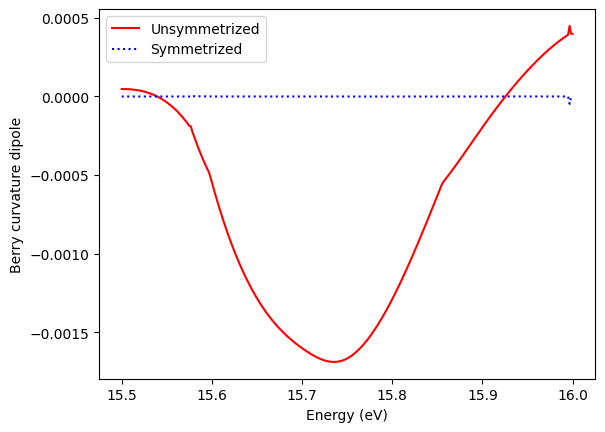

In [17]:
#unsymmetrized
#print zz component of berry dipole
fig=plt.figure()
plt.plot(Efermi_Fe,Fe_BCD[:,2,2],'r',label="Unsymmetrized") 
plt.plot(Efermi_Fe,Fe_sym_BCD[:,2,2],'b:',label="Symmetrized") 
plt.legend()
plt.xlabel('Energy (eV)')
plt.ylabel('Berry curvature dipole')

Symmetrized system gives us better results with low-density k-grid. But it still looks like not perfect zero. At some energy where have band intersections, we can see some little peaks come from digital error. There are very large Berry curvature and it's derivative around band intersections. They may enlarge digital errors. 